In [2]:
# Question 1

from collections import Counter

def minWindow(s: str, t: str) -> str:
    if not t or not s:
        return ""

    dict_t = Counter(t)
    required = len(dict_t)
    l, r = 0, 0
    formed = 0
    window_counts = {}
    ans = float("inf"), None, None

    while r < len(s):
        character = s[r]
        window_counts[character] = window_counts.get(character, 0) + 1

        if character in dict_t and window_counts[character] == dict_t[character]:
            formed += 1

        while l <= r and formed == required:
            character = s[l]

            if r - l + 1 < ans[0]:
                ans = (r - l + 1, l, r)

            window_counts[character] -= 1
            if character in dict_t and window_counts[character] < dict_t[character]:
                formed -= 1

            l += 1    

        r += 1

    return "" if ans[0] == float("inf") else s[ans[1]:ans[2] + 1]

# Example usage
# s = "ADOBECO

In [3]:
# Question 2

def longestConsecutive(nums):
    num_set = set(nums)
    max_length = 0

    for num in num_set:
        if num - 1 not in num_set:
            current_num = num
            current_length = 1

            while current_num + 1 in num_set:
                current_num += 1
                current_length += 1

            max_length = max(max_length, current_length)

    return max_length

print(longestConsecutive([100, 4, 200, 1, 3, 2]))  # Output: 4
print(longestConsecutive([0, 3, 7, 2, 5, 8, 4, 6, 0, 1]))  # Output: 9

4
9


In [4]:
# Question 3

import time
from collections import defaultdict, deque

class Instagram:
    def __init__(self):
        self.photos = defaultdict(deque)
        self.follows = defaultdict(set)

    def sharePhoto(self, userId: int, photoId: int) -> None:
        self.photos[userId].append((photoId, time.monotonic()))
        if len(self.photos[userId]) > 10:
            self.photos[userId].popleft()

    def getFeed(self, userId: int) -> list[int]:
        all_posts = list(self.photos[userId])
        for followeeId in self.follows[userId]:
            all_posts.extend(self.photos[followeeId])
        
        all_posts.sort(key=lambda x: x[1], reverse=True)
        feed = [photo_id for photo_id, _ in all_posts[:10]]
        return feed

    def follow(self, followerId: int, followeeId: int) -> None:
        self.follows[followerId].add(followeeId)

    def unfollow(self, followerId: int, followeeId: int) -> None:
        if followeeId in self.follows[followerId]:
            self.follows[followerId].remove(followeeId)

# Example usage
insta = Instagram()
insta.sharePhoto(1, 6)
insta.sharePhoto(1, 4)
print(insta.getFeed(1))  # [4, 6]
insta.follow(1, 2)
insta.sharePhoto(2, 3)
insta.sharePhoto(1, 7)
insta.sharePhoto(2, 5)
print(insta.getFeed(1))  # [5, 7, 3, 4, 6]
insta.unfollow(1, 2)
print(insta.getFeed(1))  # [7, 4, 6]

[4, 6]
[5, 7, 3, 4, 6]
[7, 4, 6]


In [5]:
# Question 4

def countSum(nums: list[int], k: int) -> int:
    sum_count = {0: 1}  
    total_sum = 0
    count = 0

    for num in nums:
        total_sum += num
        count += sum_count.get(total_sum - k, 0)
        sum_count[total_sum] = sum_count.get(total_sum, 0) + 1

    return count

print(countSum([1, 2, 3, 2, 1], 3))  # Output: 3

3


In [6]:
# Question 5

def uniqSubstr(s):
    last_occurrence = {}
    for i, char in enumerate(s):
        last_occurrence[char] = i

    lengths = []
    start, end = 0, 0

    for i, char in enumerate(s):
        end = max(end, last_occurrence[char])

        if i == end:
            lengths.append(end - start + 1)
            start = i + 1  # Update start to be the next index after the current end

    return lengths

# Example usage
s = "abcabcakghh"
# s = "ababcbacadefegdehijhklij"
print(uniqSubstr(s))  # Output: [9, 7, 8]

[7, 1, 1, 2]


n=10: π ≈ 3.2
n=100: π ≈ 3.2
n=1000: π ≈ 3.224
n=10000: π ≈ 3.1284
n=100000: π ≈ 3.13452
n=1000000: π ≈ 3.138716


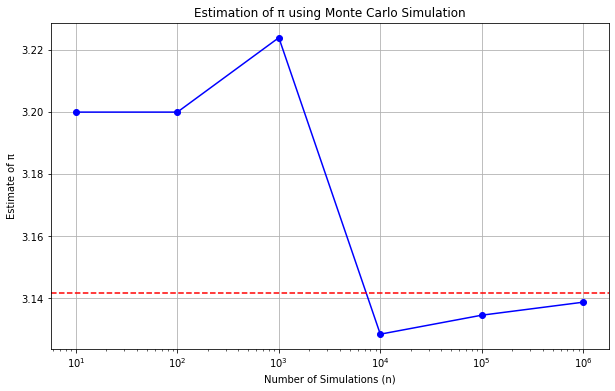

In [8]:
# Question 6

import random
import matplotlib.pyplot as plt

def estimate_pi(n):
    count = 0
    for _ in range(n):
        x, y = random.uniform(-1, 1), random.uniform(-1, 1)
        if x**2 + y**2 < 1:
            count += 1
    return 4 * count / n

def simulate_and_plot(ns):
    estimates = []
    for n in ns:
        pi_estimate = estimate_pi(n)
        estimates.append(pi_estimate)
        print(f"n={n}: π ≈ {pi_estimate}")

    plt.figure(figsize=(10, 6))
    plt.plot(ns, estimates, marker='o', linestyle='-', color='b')
    plt.axhline(y=3.141592653589793, color='r', linestyle='--')
    plt.title('Estimation of π using Monte Carlo Simulation')
    plt.xlabel('Number of Simulations (n)')
    plt.ylabel('Estimate of π')
    plt.xscale('log')  # Using a logarithmic scale for better visualization
    plt.grid(True)
    plt.show()

# Example usage
ns = [10, 100, 1000, 10000, 100000, 1000000]
simulate_and_plot(ns)